In [1]:
'''Trains a simple convnet on the MNIST dataset.

Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

batch_size = 128
nb_classes = 10
nb_epoch = 1

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])


Using TensorFlow backend.


X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 175s - loss: 0.3733 - acc: 0.8852 - val_loss: 0.0883 - val_acc: 0.9721
Test score: 0.088341826657
Test accuracy: 0.9721


1/1 [==============================] - 0s


array([2])

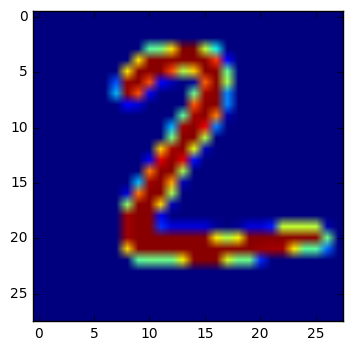

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_test[1].reshape(X_test[1].shape[0:2]))
model.predict_classes(np.array([X_test[1]]))

[5 0 4 1 9 2 1 3 1 4]


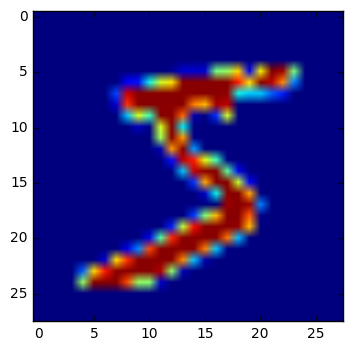

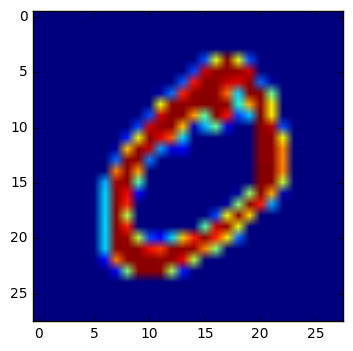

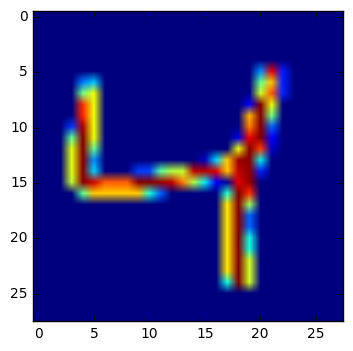

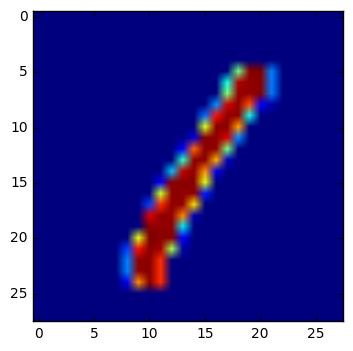

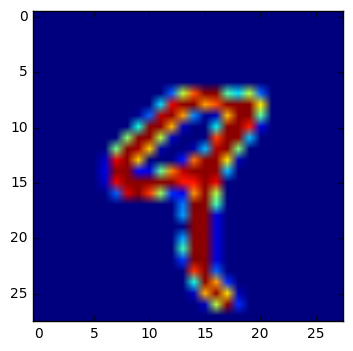

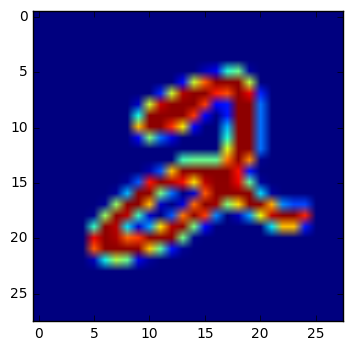

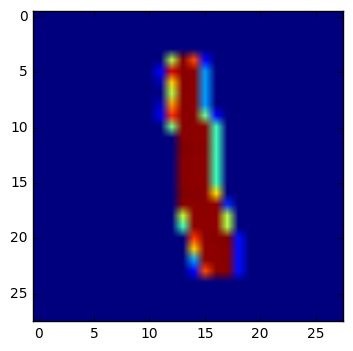

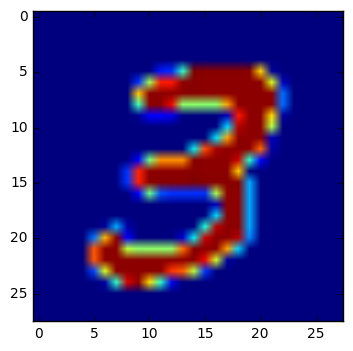

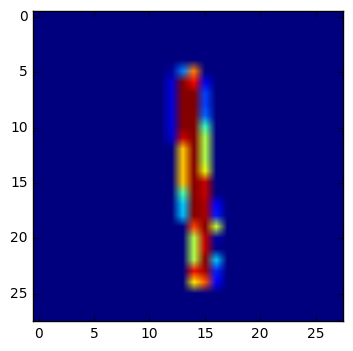

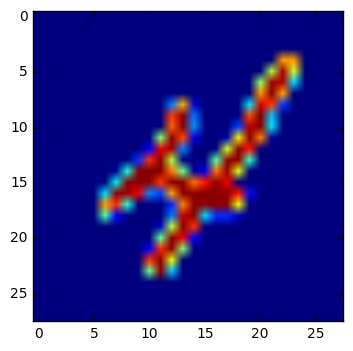

In [15]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train1 = X_train[:10]
y_train1 = y_train[:10]

print(y_train1)

import matplotlib.pyplot as plt
%matplotlib inline

for i in X_train1:
    plt.figure()
    plt.imshow(i)

In [62]:
from keras.models import Sequential
from keras.layers import LSTM, Reshape, Activation, Dense
from keras.utils import np_utils
model = Sequential()

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

model.add(LSTM(10, input_shape=(28,28)))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

model.fit(X_train, Y_train, verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 57s - loss: 2.0688 - acc: 0.2571 - val_loss: 1.8243 - val_acc: 0.3471
Epoch 2/10
60000/60000 [==============================] - 54s - loss: 1.6274 - acc: 0.4132 - val_loss: 1.4957 - val_acc: 0.4601
Epoch 3/10
60000/60000 [==============================] - 59s - loss: 1.3914 - acc: 0.5052 - val_loss: 1.3390 - val_acc: 0.5213
Epoch 4/10
60000/60000 [==============================] - 53s - loss: 1.2667 - acc: 0.5496 - val_loss: 1.2385 - val_acc: 0.5647
Epoch 5/10
60000/60000 [==============================] - 54s - loss: 1.1807 - acc: 0.5814 - val_loss: 1.1654 - val_acc: 0.5881
Epoch 6/10
60000/60000 [==============================] - 56s - loss: 1.1158 - acc: 0.6017 - val_loss: 1.1054 - val_acc: 0.6040
Epoch 7/10
60000/60000 [==============================] - 57s - loss: 1.0664 - acc: 0.6183 - val_loss: 1.0602 - val_acc: 0.6220
Epoch 8/10
60000/60000 [==============================